In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import ravel
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from stratify import StratifyData
from scipy.stats import mode

In [2]:
def pre_processing(address):
    dataColumns = ["Distância Ruidosa", "Velocidade Ruidosa", "Capacidade de Frenagem Ruidosa",
                    "Decisão"]
    
    dataset = pd.read_csv(address, header = None, names = dataColumns)

    #Define as entradas e as saídas do dataset
    inputs = dataset.drop(columns = ['Decisão'])

    outputs = dataset[['Decisão']]

    outputs = outputs.replace(to_replace=0, value=-1)

    return inputs, outputs

In [21]:
pp_data_inputs, pp_data_outputs = pre_processing("DatasetT&V.csv")
print(pp_data_inputs)
print(pp_data_outputs)

n_data_minus_one = len(pp_data_outputs[pp_data_outputs['Decisão'] == -1])
print(n_data_minus_one)

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0               0.000000            0.000000                          1.3950
1               0.000000            0.000000                          1.1625
2               1.579846            0.000000                          0.9300
3               0.282185            0.000000                          0.7800
4               0.394876            0.000000                          0.6500
...                  ...                 ...                             ...
57280        2000.433820           26.977928                          1.3950
57281        1999.988138           28.886308                          1.1625
57282        1998.246886           28.409583                          0.9300
57283        2002.044078           27.358991                          0.7800
57284        1998.055064           27.991858                          0.6500

[57285 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

In [8]:
# C
C = [float(x) for x in np.arange(0.1, 1+0.1, step = 0.1)]

# kernel
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# degree
degree = [int(x) for x in np.arange(2, 10+2, step = 2)]

# gamma
gamma = ['auto', 'scale']

# coef0
coef0 = [float(x) for x in np.arange(0.1, 1+0.25, step = 0.25)]

# shrinking
shrinking = [True, False]

# tol
tol = [0.001, 0.0001]

# decision_function_shape
decision_function_shape = ['ovo', 'ovr']

# max_iter
max_iter = [int(x) for x in np.linspace(start = 75000, stop = 125000, num = 11)]

# Montagem da estrutura de dados para o treinamento de otimização dos hiperparâmetros com as variações anteriores.
randParams = {'C'                       : C,
              'kernel'                  : kernel,
              'degree'                  : degree,
              'gamma'                   : gamma,
              'coef0'                   : coef0,
              'shrinking'               : shrinking,
              'tol'                     : tol,
              'decision_function_shape' : decision_function_shape,
              'max_iter'                : max_iter
             }

# Definição da lista de métricas
scoring = 'recall'

print (randParams)

{'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 4, 6, 8, 10], 'gamma': ['auto', 'scale'], 'coef0': [0.1, 0.35, 0.6, 0.8499999999999999, 1.0999999999999999], 'shrinking': [True, False], 'tol': [0.001, 0.0001], 'decision_function_shape': ['ovo', 'ovr'], 'max_iter': [75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000]}


In [9]:
svm = SVC()

svmTries = RandomizedSearchCV(estimator = svm, param_distributions = randParams, scoring = scoring, n_iter = 100,
                              cv = model_selection.KFold(n_splits=10, shuffle=True), verbose=4, n_jobs = 2)

svmTries.fit(pp_data_inputs, pp_data_outputs)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\R2D2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\R2D2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\R2D2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py", line 269, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and nee

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=SVC(), n_iter=100, n_jobs=2,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'coef0': [0.1, 0.35, 0.6,
                                                  0.8499999999999999,
                                                  1.0999999999999999],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [2, 4, 6, 8, 10],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'max_iter': [75000, 80000, 85000, 90000,
                                                     95000, 100000, 105000,
                                                     110000, 115000, 120000,
                                                     125000],
                                        'shrinking': [True, False],
                                        'tol': [0.001, 0.0001]},
                   scoring='recall', verbose=4)

In [53]:
print(svmTries.best_params_)
print(f'5-Fold Best recall = {svmTries.best_score_}' )

{'tol': 0.0001, 'shrinking': True, 'max_iter': 100000, 'kernel': 'linear', 'gamma': 'auto', 'degree': 6, 'decision_function_shape': 'ovo', 'coef0': 0.6, 'C': 0.9}
5-Fold Best recall = 0.9293287852358837


Accuracy: 99.13589945011783
Precision: 97.7859778597786
Recall: 93.3920704845815
F1-Score: 95.53853086976115
[[10298    24]
 [   75  1060]]


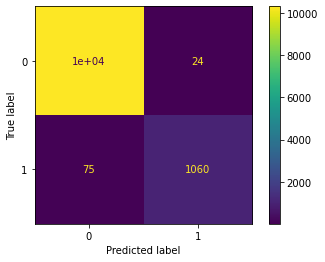

In [50]:
#final_svm = svmTries.best_estimator_

final_svm = SVC(tol=0.0001,
                shrinking=True,
                max_iter=100000,
                kernel='rbf',
                gamma='auto',
                degree=6,
                decision_function_shape='ovr',
                coef0=0.6,
                C=0.9)

inputsTrain, inputsTest, outputsTrain, outputsTest = train_test_split(pp_data_inputs, 
                                                                      pp_data_outputs,
                                                                      test_size = 0.2)

scaler = MinMaxScaler()
scaler.fit(pp_data_inputs)

inputsTrain = scaler.transform(inputsTrain)
inputsTest = scaler.transform(inputsTest)

final_svm.fit(inputsTrain, outputsTrain.values.ravel())

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_svm.predict(inputsTest)

# Métricas de performance
finalAccuracy = accuracy_score(outputsTest, predicted_apply_brakes)
finalPrecision = precision_score(outputsTest, predicted_apply_brakes)
finalRecall = recall_score(outputsTest, predicted_apply_brakes)
finalF1 = f1_score(outputsTest, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(outputsTest, predicted_apply_brakes)

# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

Accuracy: 99.15510168455965
Precision: 97.31182795698925
Recall: 94.20541290770298
F1-Score: 95.73342736248237
[[51371   150]
 [  334  5430]]


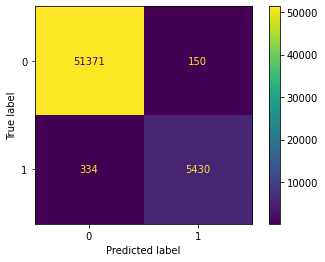

In [51]:
pp_data_inputs_test, pp_data_outputs_test = pre_processing(f"DatasetT2.csv")

pp_data_inputs_test = scaler.transform(pp_data_inputs_test)

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_svm.predict(pp_data_inputs_test)

# Métricas de performance
finalAccuracy = accuracy_score(pp_data_outputs_test, predicted_apply_brakes)
finalPrecision = precision_score(pp_data_outputs_test, predicted_apply_brakes)
finalRecall = recall_score(pp_data_outputs_test, predicted_apply_brakes)
finalF1 = f1_score(pp_data_outputs_test, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(pp_data_outputs_test, predicted_apply_brakes)
finalClassificationReport = classification_report(pp_data_outputs_test, predicted_apply_brakes)

# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()